In [1]:
import pickle
import math
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm 
from random import randint
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# DATA PREPARATION

## READ DATA





In [2]:
df = pd.read_csv('Data/fifa20.csv')

df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


## IMPUTE MISSING VALUE

In [3]:
df.fillna(df.median(), inplace=True)  # NUMERIC DATA
df = df.fillna(df.mode().iloc[0])     # STRING DATA

df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,59+2,59+2,59+2,59+2,59+2,61+2,63+2,63+2,63+2,61+2
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
# Save data
df.to_csv("Data/df.csv", sep=',',index=False, encoding='utf-8')

## CHOOSE ATTRIBUTES

In [5]:
# CHOOSEN ATRIBUTES : POTENTIAL(label), PACE, PHYSIC, PASSING, SHOOTING, DEFENDING, POWER_STAMINA
data = pd.DataFrame(columns = ['potential', 'pace', 'physic','power_stamina', 'passing', 'shooting', 'defending'])
data['potential'] = df['potential']
data['pace'] = df['pace']
data['physic'] = df['physic']
data['passing'] = df['passing']
data['shooting'] = df['shooting']
data['defending'] = df['defending']
data['power_stamina'] = df['power_stamina']
data.head()

,potential,pace,physic,power_stamina,passing,shooting,defending
0,94,87.0,66.0,75,92.0,92.0,39.0
1,93,90.0,78.0,85,82.0,93.0,35.0
2,92,91.0,58.0,81,87.0,85.0,32.0
3,93,69.0,66.0,41,58.0,54.0,56.0
4,91,91.0,66.0,84,86.0,83.0,35.0


## BINNING ATTRIBUTES POTENTIAL 

In [6]:
cut_labels = ['low', 'average', 'high']
data['potential'] = pd.cut(data['potential'], bins=3, labels=cut_labels)

In [7]:
data.head()

,potential,pace,physic,power_stamina,passing,shooting,defending
0,high,87.0,66.0,75,92.0,92.0,39.0
1,high,90.0,78.0,85,82.0,93.0,35.0
2,high,91.0,58.0,81,87.0,85.0,32.0
3,high,69.0,66.0,41,58.0,54.0,56.0
4,high,91.0,66.0,84,86.0,83.0,35.0


## FINDING OUTLIER

count    18278.000000
mean        67.845607
std         10.657660
min         24.000000
25%         63.000000
50%         69.000000
75%         74.000000
max         96.000000
Name: pace, dtype: float64

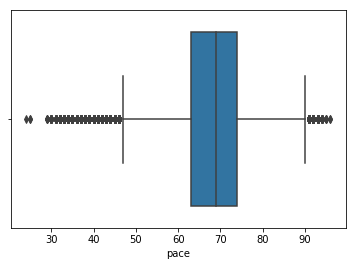

In [8]:
sns.boxplot(data["pace"])
data['pace'].describe()

count    18278.000000
mean        65.001805
std          9.207275
min         27.000000
25%         60.000000
50%         66.000000
75%         71.000000
max         90.000000
Name: physic, dtype: float64

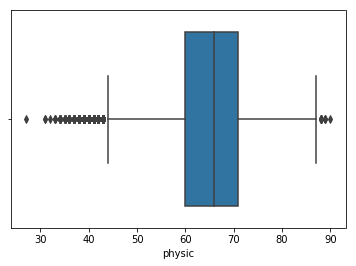

In [9]:
sns.boxplot(data["physic"])
data['physic'].describe()

count    18278.000000
mean        62.889485
std         16.017954
min         12.000000
25%         56.000000
50%         66.000000
75%         74.000000
max         97.000000
Name: power_stamina, dtype: float64

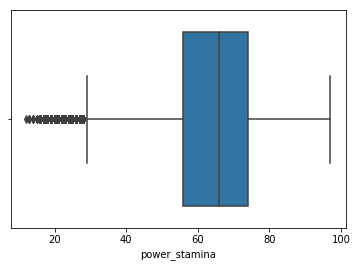

In [10]:
sns.boxplot(data["power_stamina"])
data['power_stamina'].describe()

count    18278.000000
mean        57.319127
std          9.813993
min         24.000000
25%         52.000000
50%         58.000000
75%         63.000000
max         92.000000
Name: passing, dtype: float64

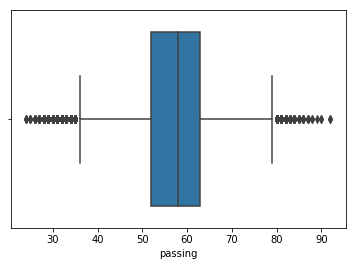

In [11]:
sns.boxplot(data["passing"])
data['passing'].describe()

count    18278.000000
mean        52.487854
std         13.235769
min         15.000000
25%         44.000000
50%         54.000000
75%         62.000000
max         93.000000
Name: shooting, dtype: float64

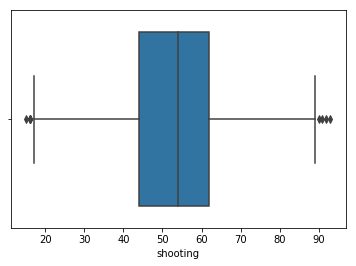

In [12]:
sns.boxplot(data["shooting"])
data['shooting'].describe()

count    18278.000000
mean        52.048802
std         15.541085
min         15.000000
25%         39.000000
50%         56.000000
75%         64.000000
max         90.000000
Name: defending, dtype: float64

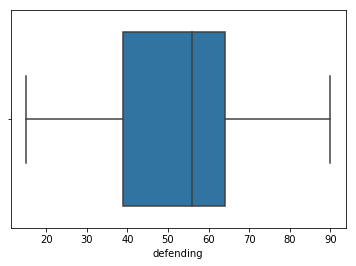

In [13]:
sns.boxplot(data["defending"])
data['defending'].describe()

## SCALING DATA 

In [14]:
# Initialise the Scaler 
scaler = MinMaxScaler() 
  
# To scale data for experiment 1
data.iloc[0:len(data),[1,2,3]] = scaler.fit_transform(data.iloc[0:len(data),[1,2,3]])

# To scale data for experimen 2
data.iloc[0:len(data),[4,5,6]] = scaler.fit_transform(data.iloc[0:len(data),[4,5,6]])

data.head()

E:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,potential,pace,physic,power_stamina,passing,shooting,defending
0,high,0.875000,0.619048,0.741176,1.000000,0.987179,0.320000
1,high,0.916667,0.809524,0.858824,0.852941,1.000000,0.266667
2,high,0.930556,0.492063,0.811765,0.926471,0.897436,0.226667
3,high,0.625000,0.619048,0.341176,0.500000,0.500000,0.546667
4,high,0.930556,0.619048,0.847059,0.911765,0.871795,0.266667


In [15]:
# Save data
data.to_csv("Data/data.csv", sep=',',index=False, encoding='utf-8')

# CLUSTERING

## CLUSRTERING K=2

In [16]:
def getParameter(row):
    return [row['physic'],row['power_stamina'],0]

def getParameter0(row):
    return [row['shooting'],row['defending'],0]

def getParameter1(row):
    return [row['pace'],row['physic'],row['power_stamina'],0]

def getParameter2(row):
    return [row['passing'],row['shooting'],row['defending'],0]

silhouette_scores = []

In [17]:
# FUNCTION FOR 2 ATTRIBUTES
def getEuclideanK2(row, c1, c2):
    euc1 = math.sqrt((row[0]-c1[0])**2 + (row[1]-c1[1])**2)
    euc2 = math.sqrt((row[0]-c2[0])**2 + (row[1]-c2[1])**2)
    return euc1, euc2

def getClusterK2(euc1, euc2):
    near = min(euc1, euc2)
    if euc1 == near:
        return 1
    elif euc2 == near:
        return 2
    
def getNewCentroidK2(parameter):
    sum1 = [0,0]
    sum2 = [0,0]
    count1 = 0
    count2 = 0
    for i in parameter:
        if i[2] == 1:
            sum1[0] += i[0]
            sum1[1] += i[1]
            count1 += 1
        elif i[2] == 2:
            sum2[0] += i[0]
            sum2[1] += i[1]
            count2 += 1
          
    c1 = [sum1[0]/count1, sum1[1]/count1]
    c2 = [sum2[0]/count2, sum2[1]/count2]
    
    return c1, c2

### ATTRIBUTES : PHYSIC, POWER STAMINA

In [18]:
parameter = data.apply(getParameter, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))

c1_1 = parameter[idxc1][0:2]
c2_1 = parameter[idxc2][0:2]

while True:
    for i in parameter:
        euc1, euc2 = getEuclideanK2(i, c1_1, c2_1)
        i[2] = getClusterK2(euc1, euc2)
    prev_c1 = copy.deepcopy(c1_1)
    prev_c2 = copy.deepcopy(c2_1)
    
    c1_1, c2_1 = getNewCentroidK2(parameter)
    if prev_c1 == c1_1 and prev_c2 == c2_1:
        break

att_1 = []
cluster_1 = []
att1_1_1 = []
att1_2_1 = []

att2_1_1 = []
att2_2_1 = []

for i in parameter:
    att_1.append([i[0],i[1]])
    cluster_1.append(i[2])
    if i[2] == 1: 
        att1_1_1.append(i[0]) 
        att1_2_1.append(i[1]) 
    else:
        att2_1_1.append(i[0])
        att2_2_1.append(i[1])
        
score_1 = silhouette_score(att_1, cluster_1)
print("Silhoutte Score | K = 2 and Attributes = Physic, Power Stamina")
print(">>>",score_1)

silhouette_scores.append({'K':2,'Attributes':'Physic, Power Stamina','Silhouette Score':score_1})

Silhoutte Score | K = 2 and Attributes = Physic, Power Stamina
>>> 0.4534536326859809


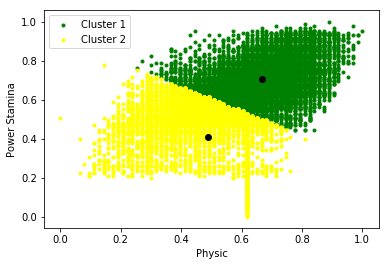

In [19]:
# VISUALISASI DATA YANG DAPAT LABEL 1
plt.scatter(att1_1_1,att1_2_1,color='green', marker='.', label='Cluster 1')
plt.scatter(c1_1[0],c1_1[1],color='black',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
plt.scatter(att2_1_1, att2_2_1,color='yellow', marker='.', label='Cluster 2')
plt.scatter(c2_1[0],c2_1[1],color='black',marker='o')


plt.xlabel('Physic')
plt.ylabel('Power Stamina')

plt.legend()

plt.show()

## Attributes : Shooting, Defending

In [20]:
parameter = data.apply(getParameter0, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))

c1_2 = parameter[idxc1][0:2]
c2_2 = parameter[idxc2][0:2]

while True:
    for i in parameter:
        euc1, euc2 = getEuclideanK2(i, c1_2, c2_2)
        i[2] = getClusterK2(euc1, euc2)
    prev_c1 = copy.deepcopy(c1_2)
    prev_c2 = copy.deepcopy(c2_2)
    
    c1_2, c2_2 = getNewCentroidK2(parameter)
    if prev_c1 == c1_2 and prev_c2 == c2_2:
        break

att_2 = []
cluster_2 = []
att1_1_2 = []
att1_2_2 = []

att2_1_2 = []
att2_2_2 = []

for i in parameter:
    att_2.append([i[0],i[1]])
    cluster_2.append(i[2])
    if i[2] == 1: 
        att1_1_2.append(i[0]) 
        att1_2_2.append(i[1]) 
    else:
        att2_1_2.append(i[0])
        att2_2_2.append(i[1])
        
score_2 = silhouette_score(att_2, cluster_2)
print("Silhoutte Score | K = 2 and Attributes = Shooting, Defending")
print(">>>",score_2)

silhouette_scores.append({'K':2,'Attributes':'Shooting, Defending','Silhouette Score':score_2})

Silhoutte Score | K = 2 and Attributes = Shooting, Defending
>>> 0.5087231580285517


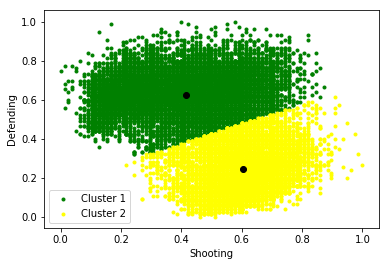

In [21]:
# VISUALISASI DATA YANG DAPAT LABEL 1
plt.scatter(att1_1_2,att1_2_2,color='green', marker='.', label='Cluster 1')
plt.scatter(c1_2[0],c1_2[1],color='black',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
plt.scatter(att2_1_2, att2_2_2,color='yellow', marker='.', label='Cluster 2')
plt.scatter(c2_2[0],c2_2[1],color='black',marker='o')


plt.xlabel('Shooting')
plt.ylabel('Defending')

plt.legend()

plt.show()

In [22]:
# FUNCTION FOR 3 ATTRIBUTES
def getEuclideanK2(row, c1, c2):
    euc1 = math.sqrt((row[0]-c1[0])**2 + (row[1]-c1[1])**2 + (row[2]-c1[2])**2)
    euc2 = math.sqrt((row[0]-c2[0])**2 + (row[1]-c2[1])**2 + (row[2]-c2[2])**2)
    return euc1, euc2

def getClusterK2(euc1, euc2):
    near = min(euc1, euc2)
    if euc1 == near:
        return 1
    elif euc2 == near:
        return 2
    
def getNewCentroidK2(parameter):
    sum1 = [0,0,0]
    sum2 = [0,0,0]
    count1 = 0
    count2 = 0
    for i in parameter:
        if i[3] == 1:
            sum1[0] += i[0]
            sum1[1] += i[1]
            sum1[2] += i[2]
            count1 += 1
        elif i[3] == 2:
            sum2[0] += i[0]
            sum2[1] += i[1]
            sum2[2] += i[2]
            count2 += 1
          
    c1 = [sum1[0]/count1, sum1[1]/count1, sum1[2]/count1]
    c2 = [sum2[0]/count2, sum2[1]/count2, sum2[2]/count2]
    
    return c1, c2

### Fitur : Pace, Physic, Power Stamina

In [23]:
parameter = data.apply(getParameter1, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))

c1_3 = parameter[idxc1][0:3]
c2_3 = parameter[idxc2][0:3]

while True:
    for i in parameter:
        euc1, euc2 = getEuclideanK2(i, c1_3, c2_3)
        i[3] = getClusterK2(euc1, euc2)
    prev_c1 = copy.deepcopy(c1_3)
    prev_c2 = copy.deepcopy(c2_3)
    
    c1_3, c2_3 = getNewCentroidK2(parameter)
    if prev_c1 == c1_3 and prev_c2 == c2_3:
        break

att_3 = []
cluster_3 = []
att1_1_3 = []
att1_2_3 = []
att1_3_3 = []

att2_1_3 = []
att2_2_3 = []
att2_3_3 = []

for i in parameter:
    att_3.append([i[0],i[1],i[2]])
    cluster_3.append(i[3])
    if i[3] == 1: 
        att1_1_3.append(i[0]) 
        att1_2_3.append(i[1]) 
        att1_3_3.append(i[2]) 
    else:
        att2_1_3.append(i[0])
        att2_2_3.append(i[1])
        att2_3_3.append(i[2])
        
score_3 = silhouette_score(att_3, cluster_3)
print("Silhoutte Score | K = 2 and Attributes = Pace, Physic, Power Stamina")
print(">>>",score_3)

silhouette_scores.append({'K':2,'Attributes':'Pace, Physic, Power Stamina','Silhouette Score':score_3})

Silhoutte Score | K = 2 and Attributes = Pace, Physic, Power Stamina
>>> 0.3453511803586979


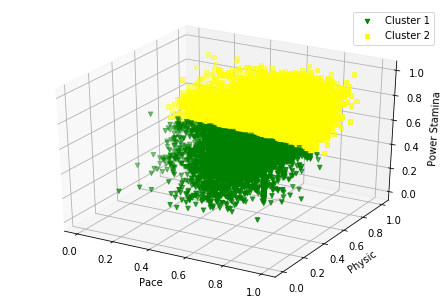

In [24]:
fig=plt.figure()
ax=Axes3D(fig)

# VISUALISASI DATA YANG DAPAT LABEL 1
ax.scatter(att1_1_3,att1_2_3,att1_3_3,color='green', marker='v', label='Cluster 1')
ax.scatter(c1_3[0],c1_3[1],c1_3[2],color='red',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
ax.scatter(att2_1_3, att2_2_3, att2_3_3,color='yellow', marker=',', label='Cluster 2')
ax.scatter(c2_3[0],c2_3[1],c2_3[2],color='red',marker='o')


ax.set_xlabel('Pace')
ax.set_ylabel('Physic')
ax.set_zlabel('Power Stamina')

ax.legend()

plt.show()

### Fitur : Passing, Shooting, Defending

In [25]:
parameter = data.apply(getParameter2, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))

#ITERASI PERTAMA
c1_4 = parameter[idxc1][0:3]
c2_4 = parameter[idxc2][0:3]
while True:
    for i in parameter:
        euc1, euc2 = getEuclideanK2(i, c1_4, c2_4)
        i[3] = getClusterK2(euc1, euc2)
    prev_c1 = copy.deepcopy(c1_4)
    prev_c2 = copy.deepcopy(c2_4)
    
    c1, c2 = getNewCentroidK2(parameter)
    if prev_c1 == c1_4 and prev_c2 == c2_4:
        break

att_4 = []
cluster_4 = []

att1_1_4 = []
att1_2_4 = []
att1_3_4 = []

att2_1_4 = []
att2_2_4 = []
att2_3_4 = []

for i in parameter:
    cluster_4.append(i[3])
    att_4.append([i[0],i[1],i[2]])
    if i[3] == 1: 
        att1_1_4.append(i[0]) 
        att1_2_4.append(i[1]) 
        att1_3_4.append(i[2]) 
    else:
        att2_1_4.append(i[0])
        att2_2_4.append(i[1])
        att2_3_4.append(i[2])

score_4 = silhouette_score(att_4, cluster_4)
print("Silhoutte Score | K = 2 and Attributes = Passing, Shooting, Defending")
print(">>>",score_4)

silhouette_scores.append({'K':2,'Attributes':'Passing, Shooting, Defending','Silhouette Score':score_4})

Silhoutte Score | K = 2 and Attributes = Passing, Shooting, Defending
>>> 0.4243200141289028


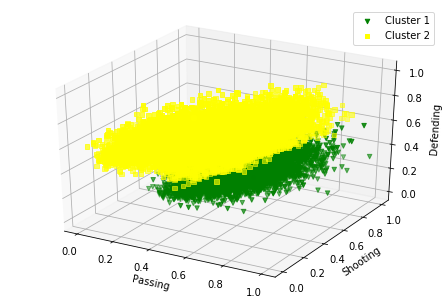

In [26]:
fig=plt.figure()
ax=Axes3D(fig)

# VISUALISASI DATA YANG DAPAT LABEL 1
ax.scatter(att1_1_4,att1_2_4,att1_3_4,color='green', marker='v', label='Cluster 1')
ax.scatter(c1_4[0],c1_4[1],c1_4[2],color='red',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
ax.scatter(att2_1_4, att2_2_4, att2_3_4,color='yellow', marker=',', label='Cluster 2')
ax.scatter(c2_4[0],c2_4[1],c2_4[2],color='red',marker='o')


ax.set_xlabel('Passing')
ax.set_ylabel('Shooting')
ax.set_zlabel('Defending')

ax.legend()

plt.show()

# CLUSRTERING K=3

In [27]:
# FUNCTION FOR 2 ATTRIBUTES
def getEuclidean(row, c1, c2, c3):
    euc1 = math.sqrt((row[0]-c1[0])**2 + (row[1]-c1[1])**2)
    euc2 = math.sqrt((row[0]-c2[0])**2 + (row[1]-c2[1])**2)
    euc3 = math.sqrt((row[0]-c3[0])**2 + (row[1]-c3[1])**2)
    return euc1, euc2, euc3

def getCluster(euc1, euc2, euc3):
    near = min(euc1, euc2, euc3)
    if euc1 == near:
        return 1
    elif euc2 == near:
        return 2
    else :
        return 3
    
def getNewCentroid(parameter):
    sum1 = [0,0]
    sum2 = [0,0]
    sum3 = [0,0]
    count1 = 0
    count2 = 0
    count3 = 0
    for i in parameter:
        if i[2] == 1:
            sum1[0] += i[0]
            sum1[1] += i[1]
            count1 += 1
        elif i[2] == 2:
            sum2[0] += i[0]
            sum2[1] += i[1]
            count2 += 1
        else :
            sum3[0] += i[0]
            sum3[1] += i[1]
            count3 += 1
          
    c1 = [sum1[0]/count1, sum1[1]/count1]
    c2 = [sum2[0]/count2, sum2[1]/count2]
    c3 = [sum3[0]/count3, sum3[1]/count3]
    
    return c1, c2, c3

### Attributes : PHYSIC, POWER STAMINA

In [28]:
parameter = data.apply(getParameter, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))
    
idxc3 = randint(0,len(parameter))
while idxc3 == idxc1 or idxc3 == idxc2:
    idxc3 = randint(0,len(parameter))

#ITERASI PERTAMA
c1_5 = parameter[idxc1][0:2]
c2_5 = parameter[idxc2][0:2]
c3_5 = parameter[idxc3][0:2]

while True:
    for i in parameter:
        euc1, euc2, euc3 = getEuclidean(i, c1_5, c2_5, c3_5)
        i[2] = getCluster(euc1, euc2, euc3)
    prev_c1 = copy.deepcopy(c1_5)
    prev_c2 = copy.deepcopy(c2_5)
    prev_c3 = copy.deepcopy(c3_5)
    
    c1_5, c2_5, c3_5 = getNewCentroid(parameter)
    if prev_c1 == c1_5 and prev_c2 == c2_5 and prev_c3 == c3_5:
        break

att1_1_5 = []
att1_2_5 = []

att2_1_5 = []
att2_2_5 = []

att3_1_5 = []
att3_2_5 = []

att_5 = []
cluster_5 = []

for i in parameter:
    cluster_5.append(i[2])
    att_5.append([i[0],i[1]])
    if i[2] == 1: 
        att1_1_5.append(i[0]) 
        att1_2_5.append(i[1]) 
    elif i[2] == 2:
        att2_1_5.append(i[0])
        att2_2_5.append(i[1])
    elif i[2] == 3:
        att3_1_5.append(i[0])
        att3_2_5.append(i[1])
        
score_5 = silhouette_score(att_5, cluster_5)
print("Silhoutte Score | K = 3 and Attributes = Physic, Power Stamina")
print(">>>",score_5)

silhouette_scores.append({'K':3,'Attributes':'Physic, Power Stamina','Silhouette Score':score_5})

Silhoutte Score | K = 3 and Attributes = Physic, Power Stamina
>>> 0.4582782369640925


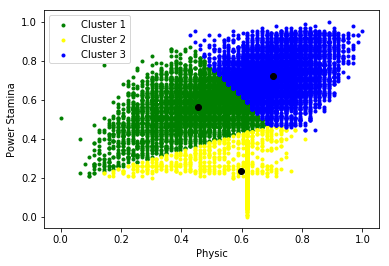

In [29]:
# VISUALISASI DATA YANG DAPAT LABEL 1
plt.scatter(att1_1_5,att1_2_5,color='green', marker='.', label='Cluster 1')
plt.scatter(c1_5[0],c1_5[1],color='black',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
plt.scatter(att2_1_5, att2_2_5,color='yellow', marker='.', label='Cluster 2')
plt.scatter(c2_5[0],c2_5[1],color='black',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 3
plt.scatter(att3_1_5, att3_2_5,color='blue', marker='.', label='Cluster 3')
plt.scatter(c3_5[0],c3_5[1],color='black',marker='o')


plt.xlabel('Physic')
plt.ylabel('Power Stamina')

plt.legend()

plt.show()

### Attributes : Shooting, Defending

In [30]:
parameter = data.apply(getParameter0, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))
    
idxc3 = randint(0,len(parameter))
while idxc3 == idxc1 or idxc3 == idxc2:
    idxc3 = randint(0,len(parameter))

#ITERASI PERTAMA
c1_6 = parameter[idxc1][0:2]
c2_6 = parameter[idxc2][0:2]
c3_6 = parameter[idxc3][0:2]

while True:
    for i in parameter:
        euc1, euc2, euc3 = getEuclidean(i, c1_6, c2_6, c3_6)
        i[2] = getCluster(euc1, euc2, euc3)
    prev_c1 = copy.deepcopy(c1_6)
    prev_c2 = copy.deepcopy(c2_6)
    prev_c3 = copy.deepcopy(c3_6)
    
    c1_6, c2_6, c3_6 = getNewCentroid(parameter)
    if prev_c1 == c1_6 and prev_c2 == c2_6 and prev_c3 == c3_6:
        break

att1_1_6 = []
att1_2_6 = []

att2_1_6 = []
att2_2_6 = []

att3_1_6 = []
att3_2_6 = []

att_6 = []
cluster_6 = []

for i in parameter:
    cluster_6.append(i[2])
    att_6.append([i[0],i[1]])
    if i[2] == 1: 
        att1_1_6.append(i[0]) 
        att1_2_6.append(i[1]) 
    elif i[2] == 2:
        att2_1_6.append(i[0])
        att2_2_6.append(i[1])
    elif i[2] == 3:
        att3_1_6.append(i[0])
        att3_2_6.append(i[1])
        
score_6 = silhouette_score(att_6, cluster_6)
print("Silhoutte Score | K = 3 and Attributes = Shooting, Defending")
print(">>>",score_6)

silhouette_scores.append({'K':3,'Attributes':'Shooting, Defending','Silhouette Score':score_6})

Silhoutte Score | K = 3 and Attributes = Shooting, Defending
>>> 0.47385094749857265


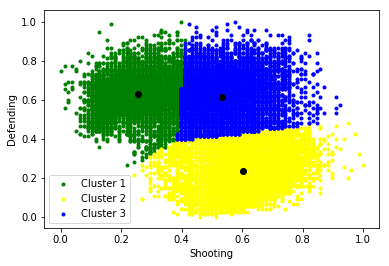

In [31]:
# VISUALISASI DATA YANG DAPAT LABEL 1
plt.scatter(att1_1_6,att1_2_6,color='green', marker='.', label='Cluster 1')
plt.scatter(c1_6[0],c1_6[1],color='black',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
plt.scatter(att2_1_6, att2_2_6,color='yellow', marker='.', label='Cluster 2')
plt.scatter(c2_6[0],c2_6[1],color='black',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 3
plt.scatter(att3_1_6, att3_2_6,color='blue', marker='.', label='Cluster 3')
plt.scatter(c3_6[0],c3_6[1],color='black',marker='o')


plt.xlabel('Shooting')
plt.ylabel('Defending')

plt.legend()

plt.show()

In [32]:
# FUNCTION FOR 3 ATTRIBUTES
def getEuclidean(row, c1, c2, c3):
    euc1 = math.sqrt((row[0]-c1[0])**2 + (row[1]-c1[1])**2 + (row[2]-c1[2])**2)
    euc2 = math.sqrt((row[0]-c2[0])**2 + (row[1]-c2[1])**2 + (row[2]-c2[2])**2)
    euc3 = math.sqrt((row[0]-c3[0])**2 + (row[1]-c3[1])**2 + (row[2]-c3[2])**2)
    return euc1, euc2, euc3

def getCluster(euc1, euc2, euc3):
    near = min(euc1, euc2, euc3)
    if euc1 == near:
        return 1
    elif euc2 == near:
        return 2
    else :
        return 3
    
def getNewCentroid(parameter):
    sum1 = [0,0,0]
    sum2 = [0,0,0]
    sum3 = [0,0,0]
    count1 = 0
    count2 = 0
    count3 = 0
    for i in parameter:
        if i[3] == 1:
            sum1[0] += i[0]
            sum1[1] += i[1]
            sum1[2] += i[2]
            count1 += 1
        elif i[3] == 2:
            sum2[0] += i[0]
            sum2[1] += i[1]
            sum2[2] += i[2]
            count2 += 1
        else :
            sum3[0] += i[0]
            sum3[1] += i[1]
            sum3[2] += i[2]
            count3 += 1
          
    c1 = [sum1[0]/count1, sum1[1]/count1, sum1[2]/count1]
    c2 = [sum2[0]/count2, sum2[1]/count2, sum2[2]/count2]
    c3 = [sum3[0]/count3, sum3[1]/count3, sum3[2]/count3]
    
    return c1, c2, c3

## Fitur : Pace, Physic, Power Stamina

In [33]:
parameter = data.apply(getParameter1, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))
    
idxc3 = randint(0,len(parameter))
while idxc3 == idxc1 or idxc3 == idxc2:
    idxc3 = randint(0,len(parameter))

#ITERASI PERTAMA
c1_7 = parameter[idxc1][0:3]
c2_7 = parameter[idxc2][0:3]
c3_7 = parameter[idxc3][0:3]

while True:
    for i in parameter:
        euc1, euc2, euc3 = getEuclidean(i, c1_7, c2_7, c3_7)
        i[3] = getCluster(euc1, euc2, euc3)
    prev_c1 = copy.deepcopy(c1_7)
    prev_c2 = copy.deepcopy(c2_7)
    prev_c3 = copy.deepcopy(c3_7)
    
    c1_7, c2_7, c3_7 = getNewCentroid(parameter)
    if prev_c1 == c1_7 and prev_c2 == c2_7 and prev_c3 == c3_7:
        break

att1_1_7 = []
att1_2_7 = []
att1_3_7 = []

att2_1_7 = []
att2_2_7 = []
att2_3_7 = []

att3_1_7 = []
att3_2_7 = []
att3_3_7 = []

att_7 = []
cluster_7 = []

for i in parameter:
    cluster_7.append(i[3])
    att_7.append([i[0],i[1],i[2]])
    if i[3] == 1: 
        att1_1_7.append(i[0]) 
        att1_2_7.append(i[1]) 
        att1_3_7.append(i[2]) 
    elif i[3] == 2:
        att2_1_7.append(i[0])
        att2_2_7.append(i[1])
        att2_3_7.append(i[2])
    elif i[3] == 3:
        att3_1_7.append(i[0])
        att3_2_7.append(i[1])
        att3_3_7.append(i[2])

score_7 = silhouette_score(att_7, cluster_7)
print("Silhoutte Score | K = 3 and Attributes = Pace, Physic, Power Stamina")
print(">>>",score_7)

silhouette_scores.append({'K':3,'Attributes':'Pace, Physic, Power Stamina','Silhouette Score':score_7})

Silhoutte Score | K = 3 and Attributes = Pace, Physic, Power Stamina
>>> 0.31680280635980873


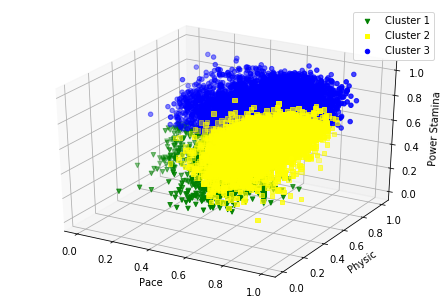

In [34]:
fig=plt.figure()
ax=Axes3D(fig)

# VISUALISASI DATA YANG DAPAT LABEL 1
ax.scatter(att1_1_7,att1_2_7,att1_3_7,color='green', marker='v', label='Cluster 1')
ax.scatter(c1_7[0],c1_7[1],c1_7[2],color='red',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
ax.scatter(att2_1_7, att2_2_7, att2_3_7,color='yellow', marker=',', label='Cluster 2')
ax.scatter(c2_7[0],c2_7[1],c2_7[2],color='red',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 3
ax.scatter(att3_1_7, att3_2_7, att3_3_7,color='blue', marker='o',label='Cluster 3')
ax.scatter(c3_7[0],c3_7[1],c3_7[2],color='red',marker='o')

ax.set_xlabel('Pace')
ax.set_ylabel('Physic')
ax.set_zlabel('Power Stamina')

ax.legend()

plt.show()

## Fitur : Passing, Shooting, Defending

In [35]:
parameter = data.apply(getParameter2, axis=1)

idxc1 = randint(0,len(parameter))
idxc2 = randint(0,len(parameter))
while idxc2 == idxc1:
    idxc2 = randint(0,len(parameter))
    
idxc3 = randint(0,len(parameter))
while idxc3 == idxc1 or idxc3 == idxc2:
    idxc3 = randint(0,len(parameter))

#ITERASI PERTAMA
c1_8 = parameter[idxc1][0:3]
c2_8 = parameter[idxc2][0:3]
c3_8 = parameter[idxc3][0:3]

while True:
    for i in parameter:
        euc1, euc2, euc3 = getEuclidean(i, c1_8, c2_8, c3_8)
        i[3] = getCluster(euc1, euc2, euc3)
    prev_c1 = copy.deepcopy(c1_8)
    prev_c2 = copy.deepcopy(c2_8)
    prev_c3 = copy.deepcopy(c3_8)
    
    c1_8, c2_8, c3_8 = getNewCentroid(parameter)
    if prev_c1 == c1_8 and prev_c2 == c2_8 and prev_c3 == c3_8:
        break

att1_1_8 = []
att1_2_8 = []
att1_3_8 = []

att2_1_8 = []
att2_2_8 = []
att2_3_8 = []

att3_1_8 = []
att3_2_8 = []
att3_3_8 = []

att_8 = []
cluster_8 = []

for i in parameter:
    cluster_8.append(i[3])
    att_8.append([i[0],i[1],i[2]])
    if i[3] == 1: 
        att1_1_8.append(i[0]) 
        att1_2_8.append(i[1]) 
        att1_3_8.append(i[2]) 
    elif i[3] == 2:
        att2_1_8.append(i[0])
        att2_2_8.append(i[1])
        att2_3_8.append(i[2])
    elif i[3] == 3:
        att3_1_8.append(i[0])
        att3_2_8.append(i[1])
        att3_3_8.append(i[2])

score_8 = silhouette_score(att_8, cluster_8)
print("Silhoutte Score | K = 3 and Attributes = Passing, Shooting, Defending")
print(">>>",score_8)

silhouette_scores.append({'K':3,'Attributes':'Passing, Shooting, Defending','Silhouette Score':score_8})

Silhoutte Score | K = 3 and Attributes = Passing, Shooting, Defending
>>> 0.42347129106407


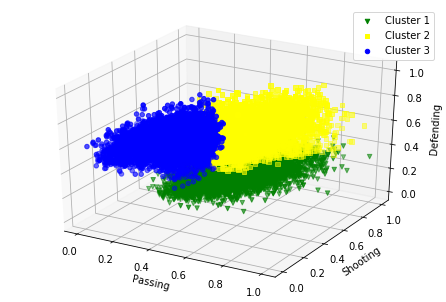

In [36]:
fig=plt.figure()
ax=Axes3D(fig)

# VISUALISASI DATA YANG DAPAT LABEL 1
ax.scatter(att1_1_8,att1_2_8,att1_3_8,color='green', marker='v', label='Cluster 1')
ax.scatter(c1_8[0],c1_8[1],c1_8[2],color='red',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 2
ax.scatter(att2_1_8, att2_2_8, att2_3_8,color='yellow', marker=',', label='Cluster 2')
ax.scatter(c2_8[0],c2_8[1],c2_8[2],color='red',marker='o')

# VISUALISASI DATA YANG DAPAT LABEL 3
ax.scatter(att3_1_8, att3_2_8, att3_3_8,color='blue', marker='o',label='Cluster 3')
ax.scatter(c3_8[0],c3_8[1],c3_8[2],color='red',marker='o')

ax.set_xlabel('Passing')
ax.set_ylabel('Shooting')
ax.set_zlabel('Defending')

ax.legend()

plt.show()

## ALL CLUSTERING RESULTS 

In [37]:
cluster_result = pd.DataFrame(silhouette_scores)
cluster_result

,K,Attributes,Silhouette Score
0,2,"Physic, Power Stamina",0.453454
1,2,"Shooting, Defending",0.508723
2,2,"Pace, Physic, Power Stamina",0.345351
3,2,"Passing, Shooting, Defending",0.424320
4,3,"Physic, Power Stamina",0.458278
5,3,"Shooting, Defending",0.473851
6,3,"Pace, Physic, Power Stamina",0.316803
7,3,"Passing, Shooting, Defending",0.423471


# CLASSIFICATION

In [38]:
data.head()

,potential,pace,physic,power_stamina,passing,shooting,defending
0,high,0.875000,0.619048,0.741176,1.000000,0.987179,0.320000
1,high,0.916667,0.809524,0.858824,0.852941,1.000000,0.266667
2,high,0.930556,0.492063,0.811765,0.926471,0.897436,0.226667
3,high,0.625000,0.619048,0.341176,0.500000,0.500000,0.546667
4,high,0.930556,0.619048,0.847059,0.911765,0.871795,0.266667


In [39]:
# POTENTIAL REPLACEMENT WITH NUMERIC VALUE
data= data.replace(
    {'potential':
     {'high': 3,
      'average': 2,
      'low': 1
     }
    })
data.head()

,potential,pace,physic,power_stamina,passing,shooting,defending
0,3,0.875000,0.619048,0.741176,1.000000,0.987179,0.320000
1,3,0.916667,0.809524,0.858824,0.852941,1.000000,0.266667
2,3,0.930556,0.492063,0.811765,0.926471,0.897436,0.226667
3,3,0.625000,0.619048,0.341176,0.500000,0.500000,0.546667
4,3,0.930556,0.619048,0.847059,0.911765,0.871795,0.266667


In [40]:
# Save data
data.to_csv("Data/data1.csv", sep=',',index=False, encoding='utf-8')

## CLASSIFICATION WITH UNBALANCED DATA 

Label Count


2    14182
1     2167
3     1929
Name: potential, dtype: int64

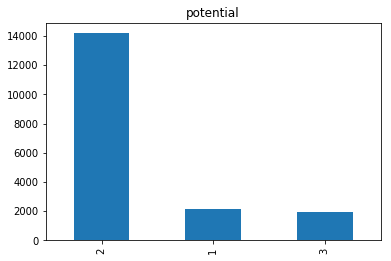

In [41]:
count_label = data['potential'].value_counts()
count_label.plot(kind='bar', title='potential')
print('Label','Count')
count_label

In [42]:
data_feature = data.filter(['pace','physic','power_stamina','passing','shooting','defending'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(data_feature, data['potential'], train_size=0.85, shuffle=True)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [43]:
# Save X_train
X_train.to_csv("Data/X_train.csv", sep=',',index=False, encoding='utf-8')

# Save X_test
X_test.to_csv("Data/X_test.csv", sep=',',index=False, encoding='utf-8')

# Save y_train
y_train.to_csv("Data/y_train.csv", sep=',',index=False, encoding='utf-8')

# Save y_test
y_test.to_csv("Data/y_test.csv", sep=',',index=False, encoding='utf-8')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [44]:
classifier = svm.SVC(kernel='linear') 

classifier.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## CLASSIFICATION WITH BALANCED DATA

In [45]:
# SEPERATED DATA BASED ON LABEL
data_label1 = data[data.potential==1]
data_label2 = data[data.potential==2]
data_label3 = data[data.potential==3]
 
# DOWNSAMPLE DATA
data_label1_downsampled = resample(data_label1, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(data_label3),     # to match minority class
                                 random_state=123) # reproducible results

data_label2_downsampled = resample(data_label2, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(data_label3),     # to match minority class
                                 random_state=123) # reproducible results

data_downsampled = pd.concat([data_label1_downsampled, data_label2_downsampled, data_label3])
data_downsampled.head()

,potential,pace,physic,power_stamina,passing,shooting,defending
12917,1,0.555556,0.587302,0.658824,0.529412,0.512821,0.613333
12144,1,0.500000,0.460317,0.623529,0.367647,0.141026,0.653333
11861,1,0.666667,0.682540,0.764706,0.588235,0.589744,0.466667
16688,1,0.625000,0.619048,0.152941,0.500000,0.500000,0.546667
17569,1,0.555556,0.285714,0.482353,0.411765,0.448718,0.306667


In [46]:
# Save data_downsampled
data_downsampled.to_csv("Data/data_downsampled.csv", sep=',',index=False, encoding='utf-8')

Label Count


3    1929
2    1929
1    1929
Name: potential, dtype: int64

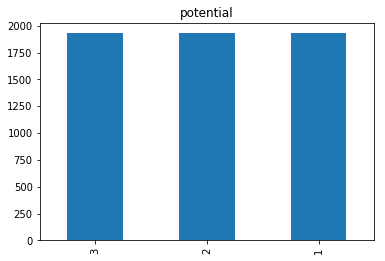

In [47]:
count_downsampled = data_downsampled['potential'].value_counts()
count_downsampled.plot(kind='bar',title='potential')
print('Label','Count')
count_downsampled

In [48]:
data_feature1 = data_downsampled.filter(['pace','physic','power_stamina','passing','shooting','defending'],axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_feature1, 
                                                        data_downsampled['potential'], 
                                                        train_size=0.85, 
                                                        shuffle=True)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
# Save X_train1
X_train1.to_csv("Data/X_train1.csv", sep=',',index=False, encoding='utf-8')

# Save X_test1
X_test1.to_csv("Data/X_test1.csv", sep=',',index=False, encoding='utf-8')

# Save y_train1
y_train1.to_csv("Data/y_train1.csv", sep=',',index=False, encoding='utf-8')

# Save y_test1
y_test1.to_csv("Data/y_test1.csv", sep=',',index=False, encoding='utf-8')

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [50]:
classifier1 = svm.SVC(kernel='linear') 

classifier1.fit(X_train1, y_train1) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## CLASSIFICATION RESULTS

In [51]:
from sklearn import metrics
df_models = pd.DataFrame([
    {
     'Model': 'Support Vector Machine',
     'Kernel' : 'Linear',
     'Balanced Data': 'No',
     'Training Set Accuracy': metrics.accuracy_score(y_train, classifier.predict(X_train)),
     'Test Set Accuracy': metrics.accuracy_score(y_test, classifier.predict(X_test))
    },
    {
     'Model': 'Support Vector Machine',
     'Kernel' : 'Linear',
     'Balanced Data': 'Yes',
     'Training Set Accuracy': metrics.accuracy_score(y_train1, classifier1.predict(X_train1)),
     'Test Set Accuracy': metrics.accuracy_score(y_test1, classifier1.predict(X_test1))
    }
])
df_models

,Model,Kernel,Balanced Data,Training Set Accuracy,Test Set Accuracy
0,Support Vector Machine,Linear,No,0.777678,0.765864
1,Support Vector Machine,Linear,Yes,0.538430,0.542002
